In [1]:
from mcd_regression import MCDRegression
import numpy as np
import os
import matplotlib.pyplot as plt

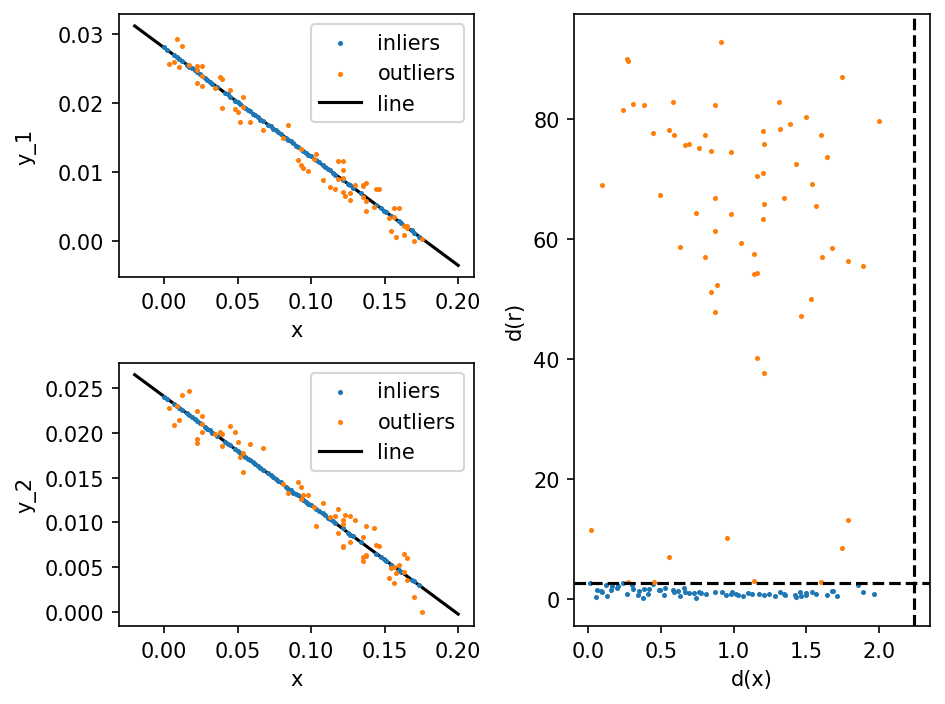

In [2]:
data = np.loadtxt(os.path.join(os.path.abspath(''), "data.txt"))
mcdr = MCDRegression()
x = data[:, 0, None]
y = data[:, 1:]
mcdr.fit(x, y)
line_x = np.array([[-0.02], [0.20]])
line_y = mcdr.predict(line_x)
fig, axd = plt.subplot_mosaic([['y1', 'd'], ['y2', 'd']], dpi=150)
plt.sca(axd["y1"])
plt.scatter(x[~mcdr.outliers, 0], y[~mcdr.outliers, 0], s=2, label="inliers")
plt.scatter(x[mcdr.outliers, 0], y[mcdr.outliers, 0], s=2, label="outliers")
plt.plot(line_x, line_y[:, 0], color="k", zorder=-1, label="line")
plt.legend()
plt.xlabel("x")
plt.ylabel("y_1")
plt.sca(axd["y2"])
plt.scatter(x[~mcdr.outliers, 0], y[~mcdr.outliers, 1], s=2, label="inliers")
plt.scatter(x[mcdr.outliers, 0], y[mcdr.outliers, 1], s=2, label="outliers")
plt.plot(line_x, line_y[:, 1], color="k", zorder=-1, label="line")
plt.xlabel("x")
plt.ylabel("y_2")
plt.legend()
plt.sca(axd["d"])
plt.scatter(mcdr.d_x[~mcdr.outliers], mcdr.d_r[~mcdr.outliers], s=2)
plt.scatter(mcdr.d_x[mcdr.outliers], mcdr.d_r[mcdr.outliers], s=2)
plt.axvline(mcdr.outlier_x_threshold, color="k", ls='--')
plt.axhline(mcdr.outlier_r_threshold, color="k", ls='--')
plt.xlabel("d(x)")
plt.ylabel("d(r)")
fig.align_ylabels()
fig.tight_layout()
plt.show()